# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #5


*   Youtube Lecture #17-22
*   Written by Seungeun Lee

## 1. Batch Normalization




*    Reference. https://huangdi.tistory.com/m/9, https://wegonnamakeit.tistory.com/m/47, https://wikidocs.net/195419
*    For https://huangdi.tistory.com/m/9, try to understand the need for Batch Normalization. (The code is not running properly due to the github issues)

In [ ]:
 # DO NOT run this code!!
# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)

relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32) # Batch Normalization for 1D data
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)


# model
# torch.nn.Seqeuntial is kind of a "stack" operation of layers
# We usually apply ReLU after the BN, but it's not a must!
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                              linear2, bn2, relu,
                              linear3).to(device)
# Model w.o. BN
# Linear + ReLU is a convention
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

In [1]:
# If not using torch.nn.Sequential, you can use class module!

import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # in __init__, initialize the layers you'd like to use
        self.fc1 = nn.Linear(100, 50)
        self.bn = nn.BatchNorm1d(num_features=50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # in forward, place the layers sequentially
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [5]:
import torch

# BN 1D
m = nn.BatchNorm1d(100)
input = torch.randn(20, 100)
output = m(input)

# BN 2D
# So far, we've only used BN 1D
# But what's BN 2D??
m = nn.BatchNorm2d(100)
input = torch.randn(20, 100, 35, 45)
output = m(input)

### Question 1. Compare & Contrast BatchNorm1d and Batchnorm2d
*     Hint: https://gaussian37.github.io/dl-concept-batchnorm/, https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html, and https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

## BatchNorm1d 는 1차원 데이터를 배치 정규화 하기 위해서 사용하는 함수이다. nn.BatchNorm1d 안에 들어가는 값은 채널의 개수 이며, 이렇게 만든 정규화에 (배치 사이즈, 채널 개수)의 크기를 갖는 입력값을 넣어주면 배치 정규화가 완료된다.

## BatchNorm2d 는 2차원 데이터를 배치 정규화 하기 위해서 사용하는 함수이다. nn.batchNorm2d 안에 들어가는 값은 nn.BatchNorm1d와 동일하게 채널의 개수이며, 이렇게 만든 정규화에 (배치 사이즈, 채널 개수, 높이, 너비)의 크기를 갖는 입력값을 넣어주면 배치 정규화가 완료된다.

## 2. Weight Initialization

*   Reference. https://ysg2997.tistory.com/14, https://m.blog.naver.com/PostView.naver?blogId=tinz6461&logNo=221599717016&proxyReferer=

In [6]:
import torch
import torch.nn as nn
import torch.nn.init as init

In [24]:
# Quick Question
# Read the document above and write a line-by-line
# explanation of the code below.
'''
딥러닝 모델을 학습시 가중치를 초기화하고, 예측값과 실제값의 차이를 손실함수를 통해 구한다. 이후 backpropagation을
이용하여 loss를 줄이는 방향으로 가중치를 업데이트 한다. 이 과정에서 첫 가중치는 랜덤한 수로 초기화 하게 되는데
이 초기화 되는 가중치의 값이 모델의 성능에 유의미한 영향을 미친다. 따라서, 여러 논문에서 모델의 성능을 높이기 위해서
여러 가지 가중치 초기화 방법을 소개하고 있다

주로 Xavier Initialization과 He Initialization이 사용된다
1. Xavier Initialization : 보통 활성화 함수로 Sigmoid 함수를 사용할 때 적용하는 가중치 초기화 기법이다.
ReLu 함수를 사용할 때 적용할 경우에 출력 값이 0으로 수렴하는 현상을 발생시킨다.

2. He Initialization : 보통 활성화 함수로 ReLu 함수를 사용할 때 적용하는 가중치 초기화 기법이다.
'''

'\n딥러닝 모델을 학습시 가중치를 초기화하고, 예측값과 실제값의 차이를 손실함수를 통해 구한다. 이후 backpropagation을 \n이용하여 loss를 줄이는 방향으로 가중치를 업데이트 한다. 이 과정에서 첫 가중치는 랜덤한 수로 초기화 하게 되는데\n이 초기화 되는 가중치의 값이 모델의 성능에 유의미한 영향을 미친다. 따라서, 여러 논문에서 모델의 성능을 높이기 위해서\n여러 가지 가중치 초기화 방법을 소개하고 있다\n\n주로 Xavier Initialization과 He Initialization이 사용된다\n1. Xavier Initialization : 보통 활성화 함수로 Sigmoid 함수를 사용할 때 적용하는 가중치 초기화 기법이다.\nReLu 함수를 사용할 때 적용할 경우에 출력 값이 0으로 수렴하는 현상을 발생시킨다. \n\n2. He Initialization : 보통 활성화 함수로 ReLu 함수를 사용할 때 적용하는 가중치 초기화 기법이다.\n'

In [26]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential( # CNN 레이어 구성
            nn.Conv2d(1,16,3,padding=1),  # 28 x 28 (1x28x28 크기의 행렬을 3x3 커널과 패딩을 이용하여 16x28x28 크기의 행렬로 변환)
            nn.ReLU(), # 활성화 함수 적용
            nn.Conv2d(16,32,3,padding=1), # 28 x 28 (16x28x28 크기의 행렬을 3x3 커널과 패딩을 이용하여 32x28x28 크기의 행렬로 변환)
            nn.ReLU(), # 활성화 함수 적용
            nn.MaxPool2d(2,2),            # 14 x 14 (Maxpool2d를 이용하여 행렬의 너비와 높이를 각각 반으로 줄임)
            nn.Conv2d(32,64,3,padding=1), # 14 x 14 (32x14x14 크기의 행렬을 3x3 커널과 패딩을 이용하여 64x14x14 크기의 행렬로 변환)
            nn.ReLU(), # 활성화 함수 적용
            nn.MaxPool2d(2,2)             #  7 x 7 (Maxpool2d를 이용하여 행렬의 너비와 높이를 각각 반으로 줄임) 최종적으로 64x7x7 크기의 행렬로 변환
        )
        self.fc_layer = nn.Sequential( # fc 레이어 구성
            nn.Linear(64*7*7,100), # ((64x7x7)개의 입력을 입력받아 100개의 은닉층으로 선형결합)
            nn.ReLU(), # 활성화 함수 적용
            nn.Linear(100,10) # 100개의 은닉층에서 10개의 값을 출력함
        )
        for m in self.modules(): # 모델을 차례차례 불러오는 for문
          if isinstance(m, nn.Conv2d): # 모델이 Conv 모델인 경우

            init.kaiming_normal_(m.weight.data) # kaiming_normal을 이용하여 He initialization을 적용시켜준다.
            m.bias.data.fill_(0)

          elif isinstance(m, nn.Linear): # 모델이 Linear 모델인 경우

            init.kaiming_normal_(m.weight.data) # kaiming_normal을 이용하여 He initialization을 적용시켜준다.
            m.bias.data.fill_(0)

    def forward(self,x):
        out = self.layer(x) # 입력값에 conv 레이어 적용
        out = out.view(batch_size,-1) # (4D의 차원을 가지고 있는 데이터를 (배치 사이즈, 채널x너비x높이) 크기로 reshape해주는 코드)
        out = self.fc_layer(out) # fc 레이어 적용
        return out

In [ ]:
# Then let's look at the efficiency of such Weight Init. techniques
# with visualization

In [ ]:
# Quick Question
# Read the document above and briefly explain the code below.

In [9]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # sigmoid 함수

# ReLU
def ReLU(x):
    return np.maximum(0, x) # ReLu 함수

# tanh
def tanh(x):
    return np.tanh(x) # tanh 함수

def weight_init(method=None): # 여러 가중치 초기화 함수를 정의
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init

    return w

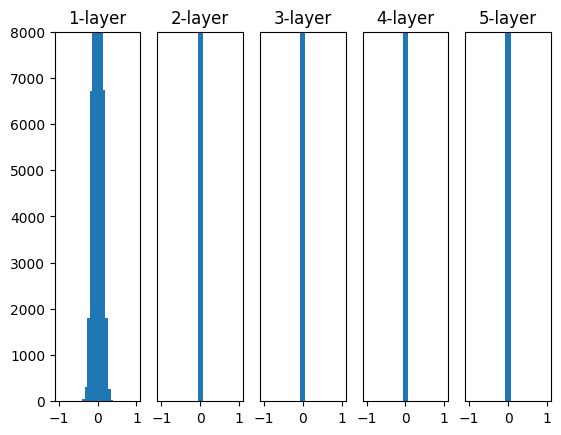

In [10]:
input_data = np.random.randn(1000, 100) # 랜덤 입력값 설정
node_num = 100 # xavier 방법과 he 방법을 이용하기 위한 노드 사이즈 설정
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 8000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show() # 밑에 그래프를 보면 값이 0으로 수렴하는 것을 확인해 볼 수 있다.

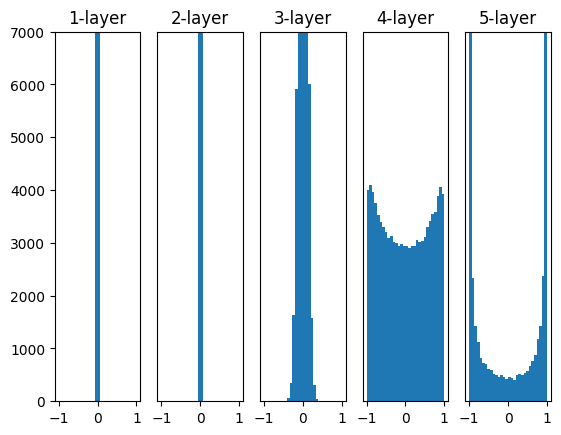

In [11]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show() # 밑에 그래프를 보면 값이 너무 커지는 것을 확인 할 수 있다.

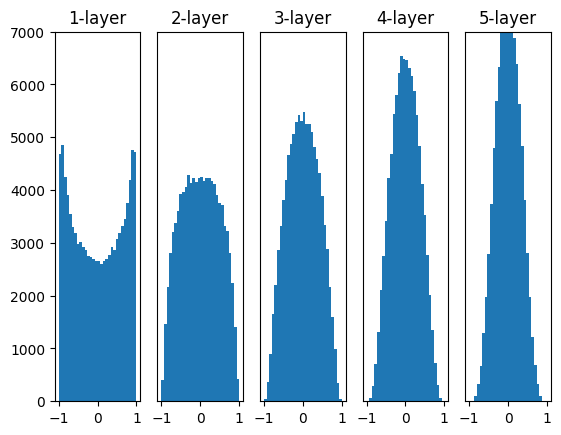

In [12]:
# Xavier Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show() # 데이터의 분포가 정규 분포 형태로 바뀌는 것을 확인 할 수 있다.

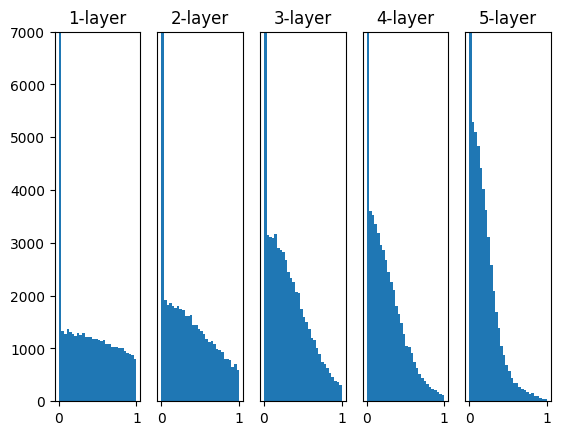

In [13]:
# He Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show() # 데이터의 분포가 0 근처에서 정규분포를 반으로 자른 분포를 따르는 것을 볼 수 있다.(ReLu 함수는 0이하의 값을 0으로 내보내기 때문에 0이하의 값은 없는 것이다.)

## 3. CNN
*     Reference. https://justkode.kr/deep-learning/pytorch-cnn/

In [ ]:
## GPU (Optional)
# 런타임 - 런타임 유형 변경 - T4 GPU
# !nvidia-smi

In [ ]:
# Question
# Run two cells below and try to explain the
# change of tensor size after passing through the layers
# e.g.) Conv1: [10, 1, 20, 20] -> [10, 3, 16, 16], because --

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1) # [10, 1, 20, 20] -> [10, 3, 16, 16] 이 된다. 채널은 1 -> 3으로 바뀌고, kernel size=5, stride=1 이므로 (20-5+1)/1 = 16으로 이미지의 크기가 바뀐다.
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1) # [10, 3, 12, 12] -> [10, 10, 12, 12] 이 된다. 채널은 3 -> 10으로 바뀌고, kernel size=5, stride=1 이므로 (16-5+1)/1 = 12으로 이미지의 크기가 바뀐다.
    self.fc1 = nn.Linear(10 * 12 * 12, 50) # [10,10x12x12] -> [10, 50]이 된다. 채널이 1440 -> 50으로 바뀌기 때문이다.
    self.fc2 = nn.Linear(50, 10) # [10,50] -> [10,10]이 된다. 채널이 50 -> 10으로 바뀌기 때문이다.

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.conv1(x))
    print("After conv1", x.size())
    x = F.relu(self.conv2(x))
    print("After conv2",x.size())
    x = x.view(-1, 10 * 12 * 12)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

Before torch.Size([10, 1, 20, 20])
After conv1 torch.Size([10, 3, 16, 16])
After conv2 torch.Size([10, 10, 12, 12])
After dimension reduction torch.Size([10, 1440])
After fc1 torch.Size([10, 50])
After fc2 torch.Size([10, 10])


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.max_pool1 = nn.MaxPool2d(kernel_size=2) # [10, 1, 20, 20] -> [10, 1, 10, 10]으로 바뀐다. Maxpooling에서 kernel size=2 이기 때문이다.
    self.max_pool2 = nn.MaxPool2d(kernel_size=2) # [10, 1, 10, 10] -> [10, 1, 5, 5]으로 바뀐다. Maxpooling에서 kernel size=2 이기 때문이다.
    self.fc1 = nn.Linear(10 * 5 * 5, 50) # [1, 250] -> [1, 50]으로 바뀐다.
    self.fc2 = nn.Linear(50, 10) # [1, 50] -> [1, 10]으로 바뀐다.

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.max_pool1(x))
    print("After max_pool1", x.size())
    x = F.relu(self.max_pool2(x))
    print("After max_pool2",x.size())
    x = x.view(-1, 10 * 5 * 5)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))

Before torch.Size([10, 1, 20, 20])
After max_pool1 torch.Size([10, 1, 10, 10])
After max_pool2 torch.Size([10, 1, 5, 5])
After dimension reduction torch.Size([1, 250])
After fc1 torch.Size([1, 50])
After fc2 torch.Size([1, 10])


In [16]:
# Now let's construct a CNN model

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [18]:
train_data = datasets.MNIST('./data/', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

test_data = datasets.MNIST('./data/', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 20462894.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 628030.06it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5571486.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7338416.32it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [20]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [21]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.2929134368896484
loss of 0 epoch, 100 index : 1.3330038785934448
loss of 0 epoch, 200 index : 0.3300339877605438
loss of 0 epoch, 300 index : 0.2850082516670227
loss of 0 epoch, 400 index : 0.23805993795394897
loss of 0 epoch, 500 index : 0.2341250628232956
loss of 0 epoch, 600 index : 0.3542083501815796
loss of 0 epoch, 700 index : 0.2991146743297577
loss of 0 epoch, 800 index : 0.2965480089187622
loss of 0 epoch, 900 index : 0.1675751805305481
loss of 0 epoch, 1000 index : 0.03636894375085831
loss of 0 epoch, 1100 index : 0.3767521381378174
loss of 1 epoch, 0 index : 0.04903970658779144
loss of 1 epoch, 100 index : 0.05601634085178375
loss of 1 epoch, 200 index : 0.1321931928396225
loss of 1 epoch, 300 index : 0.04778887704014778
loss of 1 epoch, 400 index : 0.040063317865133286
loss of 1 epoch, 500 index : 0.07746998965740204
loss of 1 epoch, 600 index : 0.06591784209012985
loss of 1 epoch, 700 index : 0.12469473481178284
loss of 1 epoch, 800 index : 0.1

In [22]:
# Quick Question
# Write an explanation of the code below (evaluation cell only!)

In [23]:
cnn.eval() # evaluation 모드로 바꿈
test_loss = 0
correct = 0
with torch.no_grad(): # 기울기 계산을 하지 않음
  for data, target in test_loader: # test_loader에서 입력 데이터와 정답 데이터를 가져옴
    output = cnn(data) # 만든 모델에 입력 데이터를 넣어 예측값을 얻음
    test_loss += criterion(output, target).item() # 예측값과 정답 데이터를 위에서 설정한 손실함수를 이용하여 손실값을 계산함
    pred = output.argmax(dim=1, keepdim=True) # 예측값의 인덱스를 저장
    correct += pred.eq(target.view_as(pred)).sum().item() # 예측해서 맞은 값의 개수를 카운트해줌
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 6.4082, Accuracy: 9894/10000 (99%)



In [ ]:
# Question (optional)
# Try to adjust the hyperparameters (kernel size, # of conv layers, ...)
# and get better results than the baseline (default) model!!

In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.conv3 = nn.Conv2d(in_channels=50, out_channels=100, kernel_size=3, padding=1, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 100, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv3(x))

        x = x.view(-1, 4 * 4 * 100) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [31]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [32]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.3056020736694336
loss of 0 epoch, 100 index : 2.1833832263946533
loss of 0 epoch, 200 index : 1.010292887687683
loss of 0 epoch, 300 index : 0.3225623071193695
loss of 0 epoch, 400 index : 0.380145788192749
loss of 0 epoch, 500 index : 0.36635932326316833
loss of 0 epoch, 600 index : 0.3937312662601471
loss of 0 epoch, 700 index : 0.29295462369918823
loss of 0 epoch, 800 index : 0.28378474712371826
loss of 0 epoch, 900 index : 0.24946081638336182
loss of 0 epoch, 1000 index : 0.24653512239456177
loss of 0 epoch, 1100 index : 0.11861347407102585
loss of 1 epoch, 0 index : 0.16095414757728577
loss of 1 epoch, 100 index : 0.29948705434799194
loss of 1 epoch, 200 index : 0.04853566735982895
loss of 1 epoch, 300 index : 0.20510444045066833
loss of 1 epoch, 400 index : 0.2625892758369446
loss of 1 epoch, 500 index : 0.16424378752708435
loss of 1 epoch, 600 index : 0.10310384631156921
loss of 1 epoch, 700 index : 0.11062368750572205
loss of 1 epoch, 800 index : 0.

In [33]:
cnn.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    output = cnn(data)
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1, keepdim=True)
    correct += pred.eq(target.view_as(pred)).sum().item()
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 5.7456, Accuracy: 9913/10000 (99%)



### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment5

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60